In [1]:
from __future__ import print_function
import datetime
import logging
import optparse
import os
import re
import sys
import pandas as pd

from tqdm import tqdm
import web
from web.embeddings import fetch_GloVe
from web import perceptual as pc
%matplotlib inline

In [2]:
e = fetch_GloVe(dim= 50, corpus="wiki-6B")

File already downloaded, skipping


In [3]:
cslb_path = '../CSLB'
cslb_matrix = os.path.join(cslb_path, 'feature_matrix.dat')
cslb_norm = os.path.join(cslb_path, 'norms.dat')

In [4]:
if not os.path.isfile(cslb_matrix):
    print("Download CSLB file first from website: http://www.csl.psychol.cam.ac.uk/propertynorms/", file=sys.stderr)
    raise FileNotFoundError(os.errno.ENOENT, os.strerror(os.errno.ENOENT), cslb_matrix)

if not os.path.isfile(cslb_norm):
    print("Download CSLB file first from website: http://www.csl.psychol.cam.ac.uk/propertynorms/", file=sys.stderr)
    raise FileNotFoundError(os.errno.ENOENT, os.strerror(os.errno.ENOENT), cslb_norm)

df_cleaned = pc.process_CSLB(cslb_matrix, e)

In [ ]:
f1, params = pc.evaluate(e, df_cleaned_cslb=df_cleaned, n_jobs=-1)

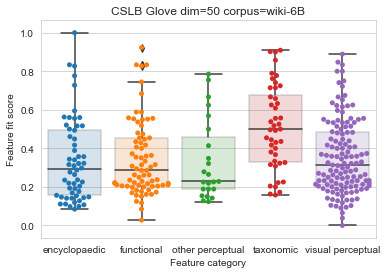

In [6]:
pc.generate_figure(f1, fig_title="Glove dim=50 corpus=wiki-6B", norms_path=cslb_norm, fig_path=None, show_visual=True)

In [7]:
# Display learning data without saving to file
score_df = pd.DataFrame(list(f1.items()), columns=['Feature', 'F1score'])

# f, f1score, alpha, end_iter, intercept, rest_of_params
params_data = {'Feature': params[:, 0], 'Alpha': params[:, 1], 'EndIter': params[:, 2], 'Intercept': params[:, 3], 'Coefs': list(params[:, 4:])}

params_df = pd.DataFrame(params_data, columns=['Feature', 'Alpha', 'EndIter', 'Intercept', 'Coefs'])

df = score_df.merge(right=params_df, on='Feature')

df = df.set_index('Feature')
df.sort_index(inplace=True)
df.head()

,F1score,Alpha,EndIter,Intercept,Coefs
Feature,,,,,
does_bite,0.23076923076923078,0.004281332398719396,9,-2.7583081617710454,"[0.36225786413851646, -2.176594599107386, -0.1..."
does_break,0.10714285714285715,0.011288378916846883,15,-1.2317863122784547,"[-0.7567501605530437, 0.8931927036651658, 0.65..."
does_burn,0.5555555555555556,0.004281332398719396,9,-2.1923296867376294,"[-1.2714546821067443, 0.4438955487125059, 1.47..."
does_buzz,0.12345679012345677,0.02976351441631313,54,0.10628061309095901,"[0.906341128243072, 0.02825196688336702, 0.391..."
does_carry,0.30303030303030304,0.011288378916846883,14,-1.1951668101917883,"[-0.8343968686340222, 0.27228490932206356, 0.9..."
